#  Data Science Assignment -1 Prediction of heart disease
  



 ###  Data Set: 

1. The following dataset is a sample that contains patients’ information (demographics
    and medical data) that relates to heart disease prediction. The features are:
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]

- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal
   Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality
   (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or
   definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

   ##    <span style="color:red">  Exploratory data analysis (EDA)</span>
- a) Get a description, general information, data types, and shape of the dataset.
- b) Determine the frequency of distinct values for each feature in the dataset.
- c) Plot all features in the dataset to check distribution using a histogram.
- d) Use a correlation matrix to check for correlation between predictor variables and
  drop correlated features (> 0.5). 

### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np     
from matplotlib import pyplot as plt 
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


import warnings
warnings.filterwarnings('ignore')

### Read the dataset

In [2]:
df = pd.read_csv('Heart_Disease_dataset.csv')

### Type of dataset

In [3]:
type(df)

pandas.core.frame.DataFrame

### Shape of dataset

In [4]:
df.shape

(918, 12)

### Types of data in the Dataset

In [5]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

### Detailed Information about Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Column (Attributes ) in dataset

In [7]:
df.columns


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

**Observations:**
- There are 180 observations and 9 columns (6 of them are numerical and 3 are categorical).
- All the column have 180 non-null values i.e. there are no missing values in the data.

## <span style="color:BLUE">Basic Statistical Analysis</span>

### The five point summary statistics

In [8]:
df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


**Observations:**

- Average age of customers is 29 years. And, the age ranges from 18 to 50.
- The average annual income of a customer is 53K. It has a range of values from 30K to 104K, which again shows a good diversity of customers.
- Median gym usage is 3 days, that means 50% of the cutstomer are going to use the gym for less than or equal to 3 days in a week.  
- Total 55.33 % people have Heart Disease problem 

#### Last Five Rows Of Dataset

In [9]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### Last Five Rows

In [10]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


#### Unique Values

In [11]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

**Observations:**
-  There is 50 unique values for the Age and 2 for the Sex(male, Female), Cholesterol has 222 unique values.

## The frequency of distinct values for each feature in the dataset

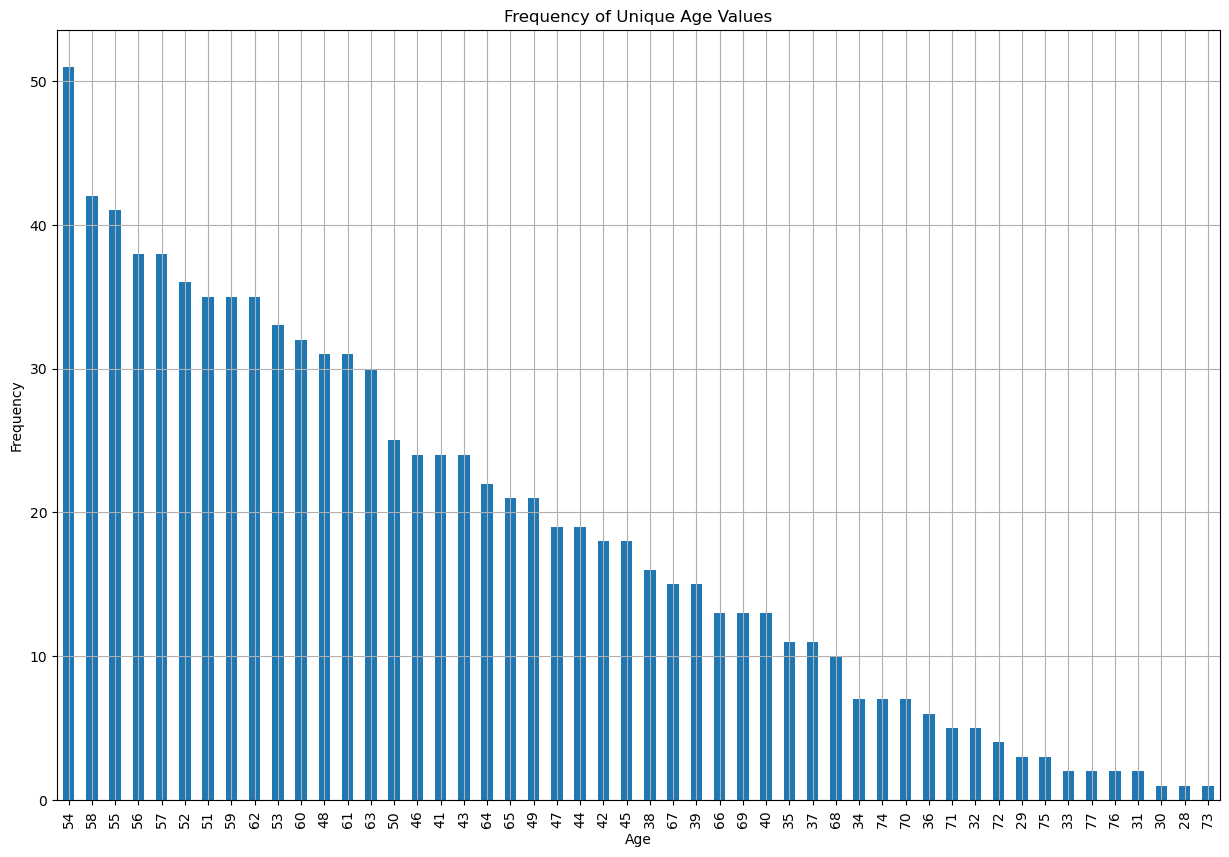

In [12]:
plt.figure(figsize=(15, 10))
age_counts = df['Age'].value_counts()
age_counts.plot(kind='bar',grid=True)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency of Unique Age Values')
plt.show()

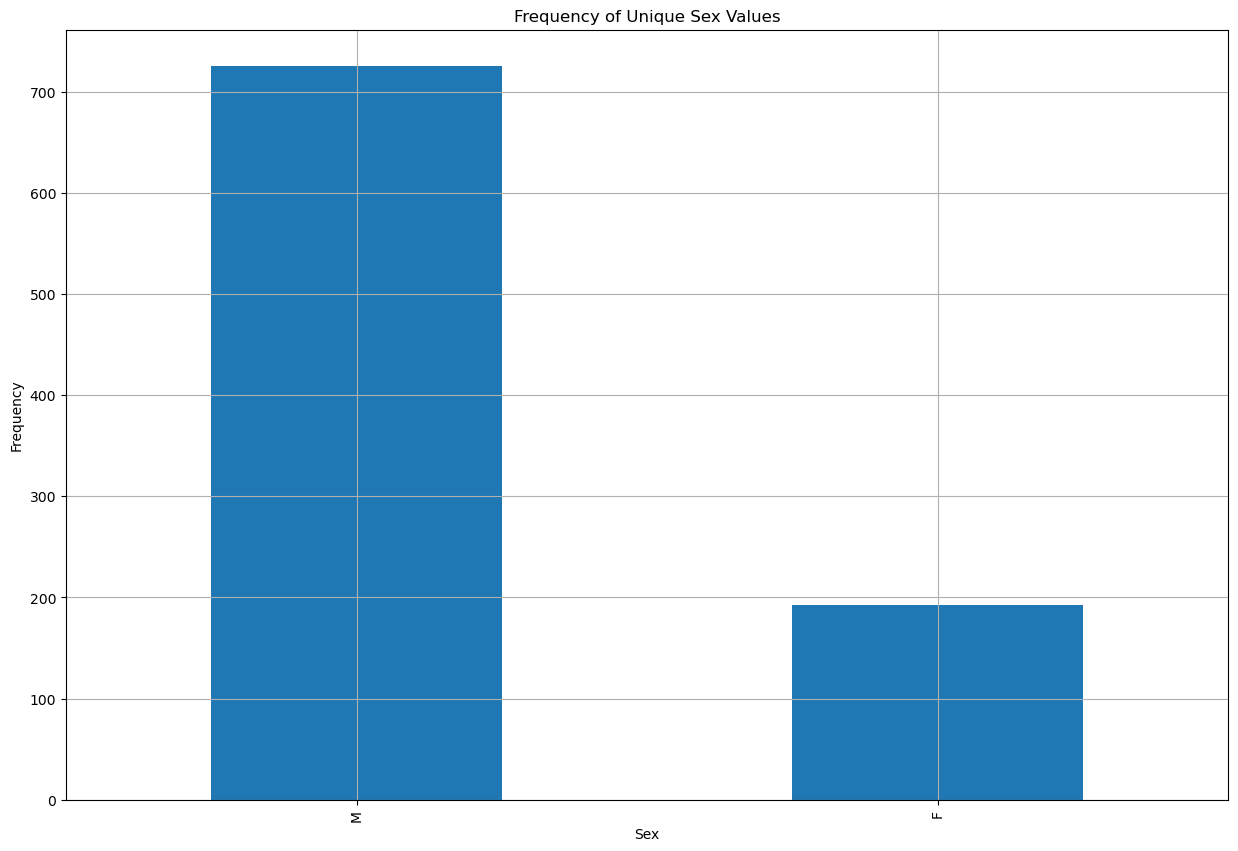

In [13]:
plt.figure(figsize=(15, 10))
sex_counts = df['Sex'].value_counts()
sex_counts.plot(kind='bar',grid=True)

plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Frequency of Unique Sex Values')
plt.show()

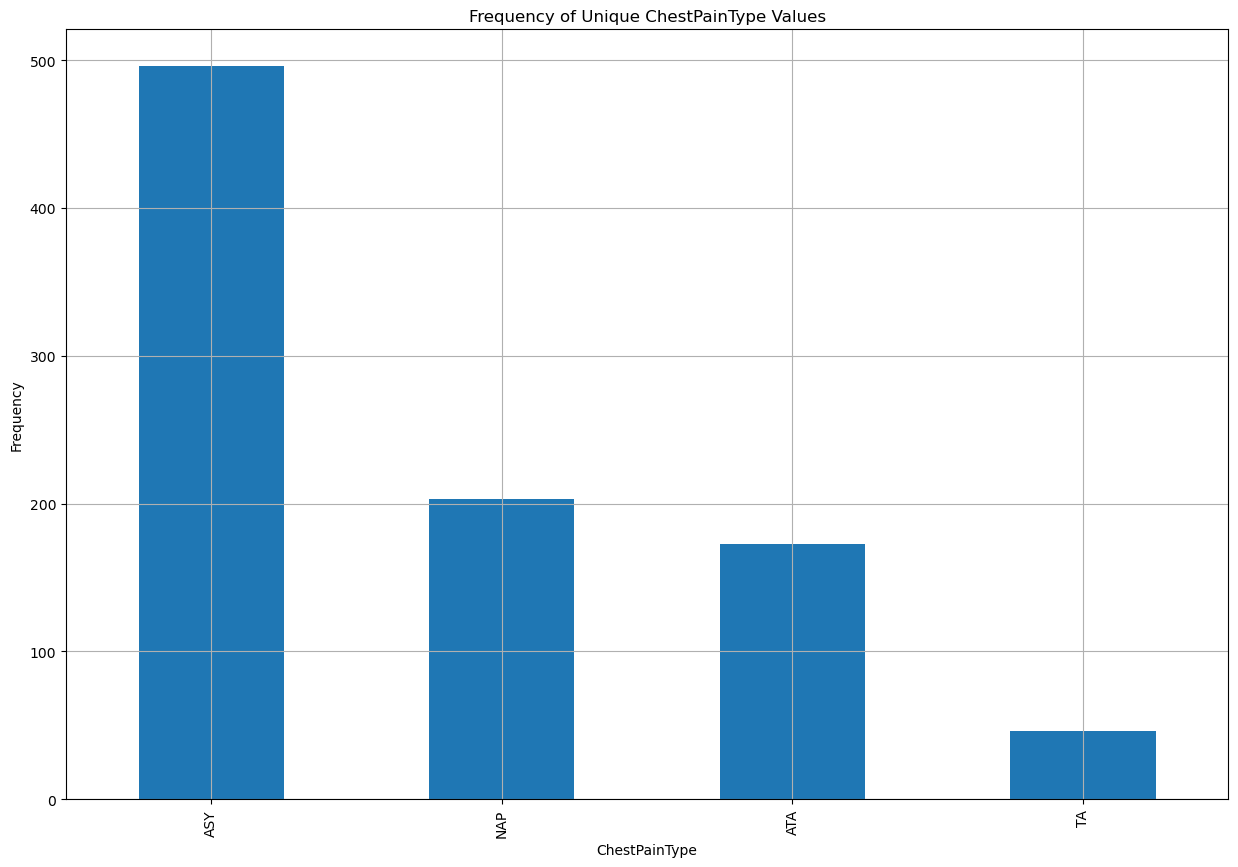

In [14]:
plt.figure(figsize=(15, 10))
ChestPainType_counts = df['ChestPainType'].value_counts()
ChestPainType_counts.plot(kind='bar',grid=True)
plt.xlabel('ChestPainType')
plt.ylabel('Frequency')
plt.title('Frequency of Unique ChestPainType Values')
plt.show()

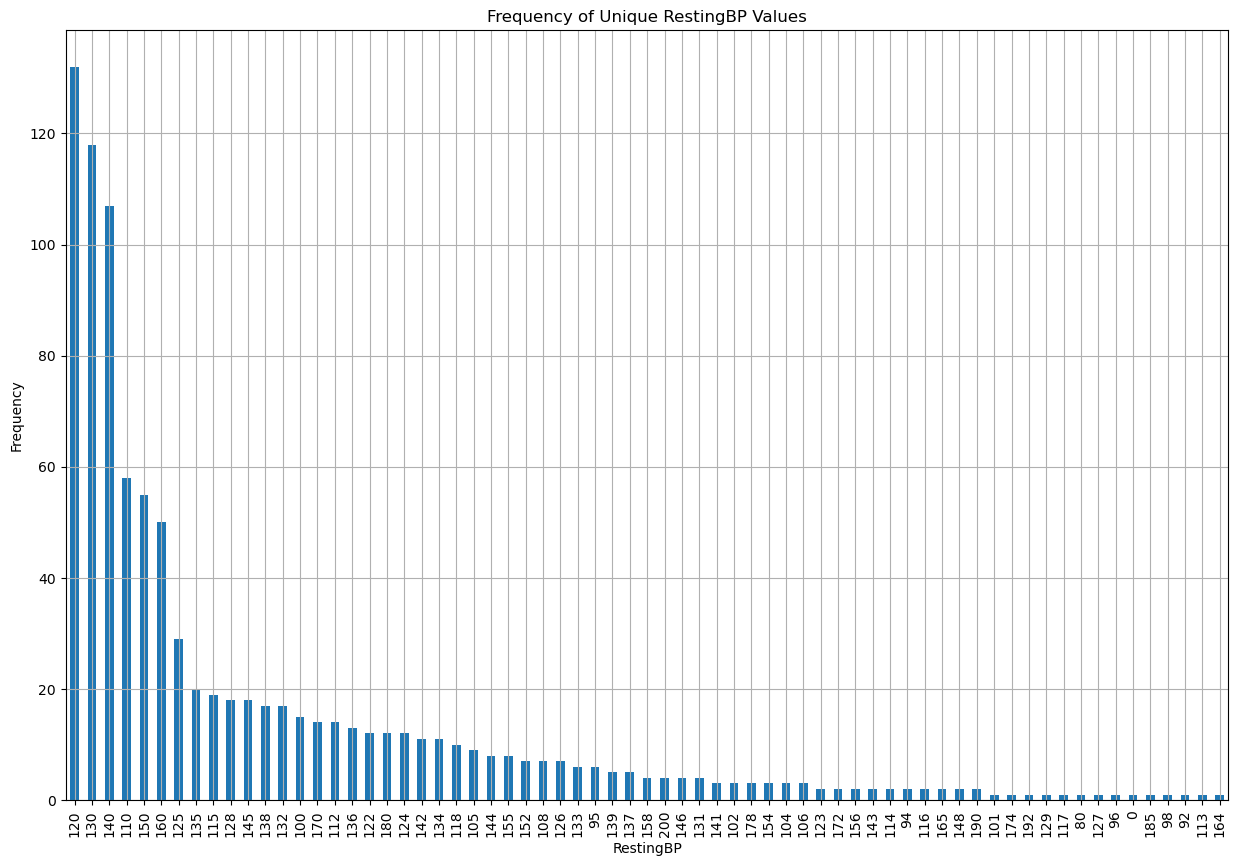

In [15]:
plt.figure(figsize=(15, 10))
RestingBP_counts = df['RestingBP'].value_counts()
RestingBP_counts.plot(kind='bar',grid=True)
plt.xlabel('RestingBP')
plt.ylabel('Frequency')
plt.title('Frequency of Unique RestingBP Values')
plt.show()

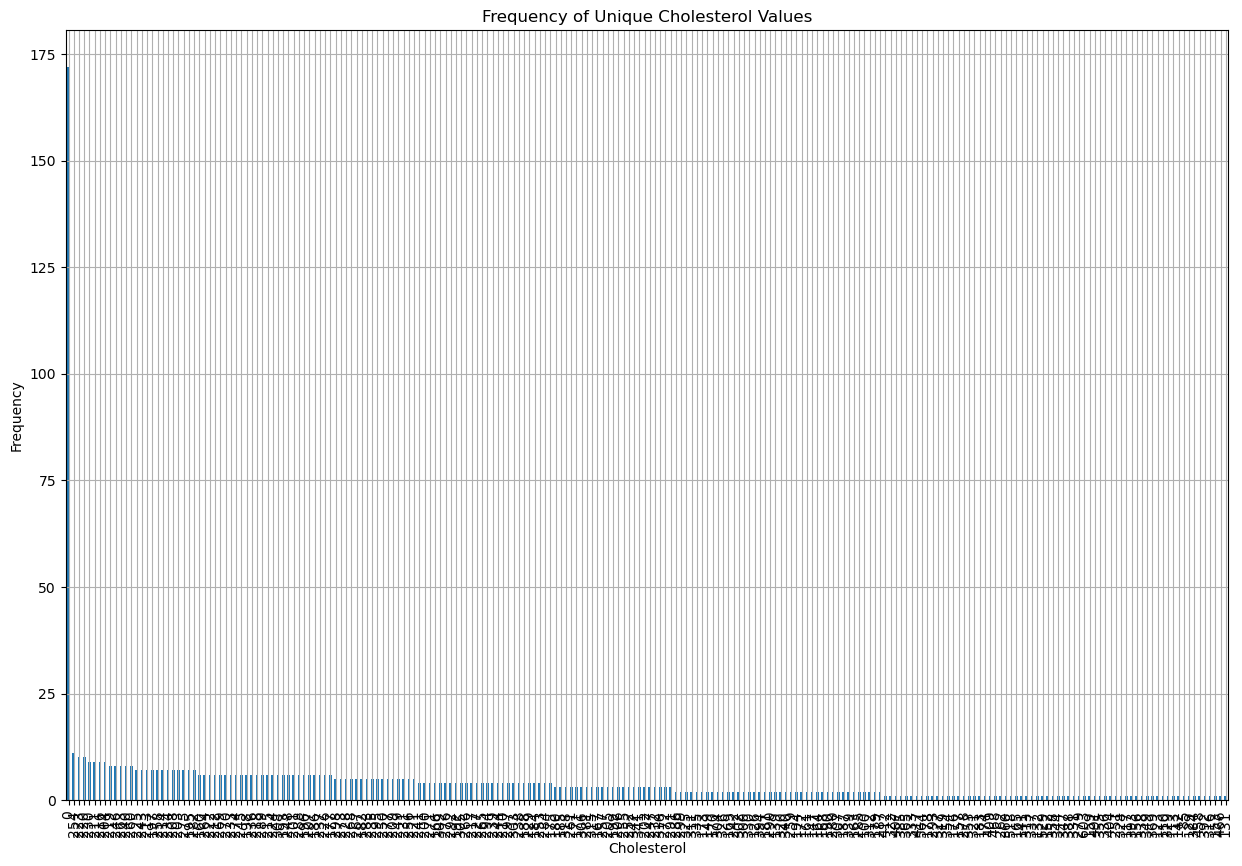

In [16]:
plt.figure(figsize=(15, 10))
Cholesterol_counts = df['Cholesterol'].value_counts()
Cholesterol_counts.plot(kind='bar',grid=True)
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.title('Frequency of Unique Cholesterol Values')
plt.show()

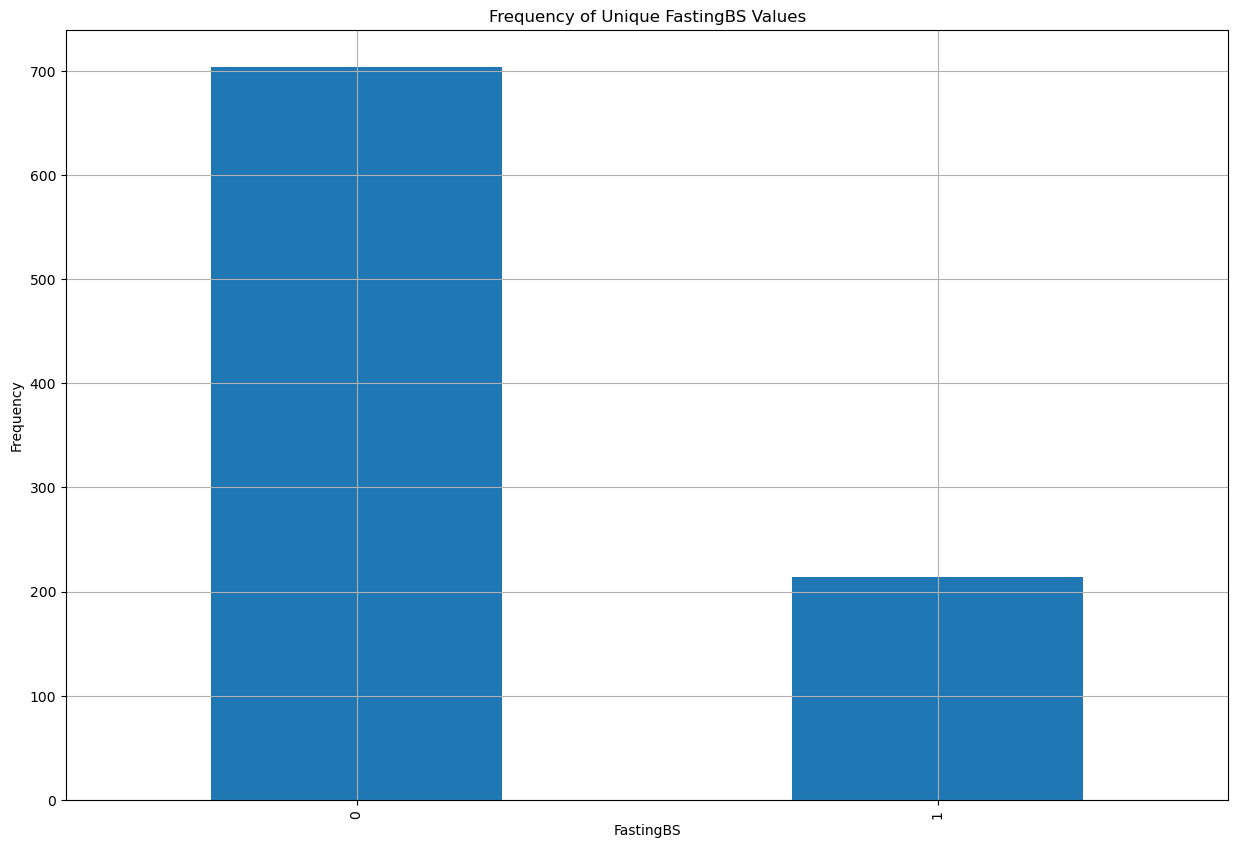

In [17]:
plt.figure(figsize=(15, 10))
FastingBS_counts = df['FastingBS'].value_counts()
FastingBS_counts.plot(kind='bar',grid=True)
plt.xlabel('FastingBS')
plt.ylabel('Frequency')
plt.title('Frequency of Unique FastingBS Values')
plt.show()

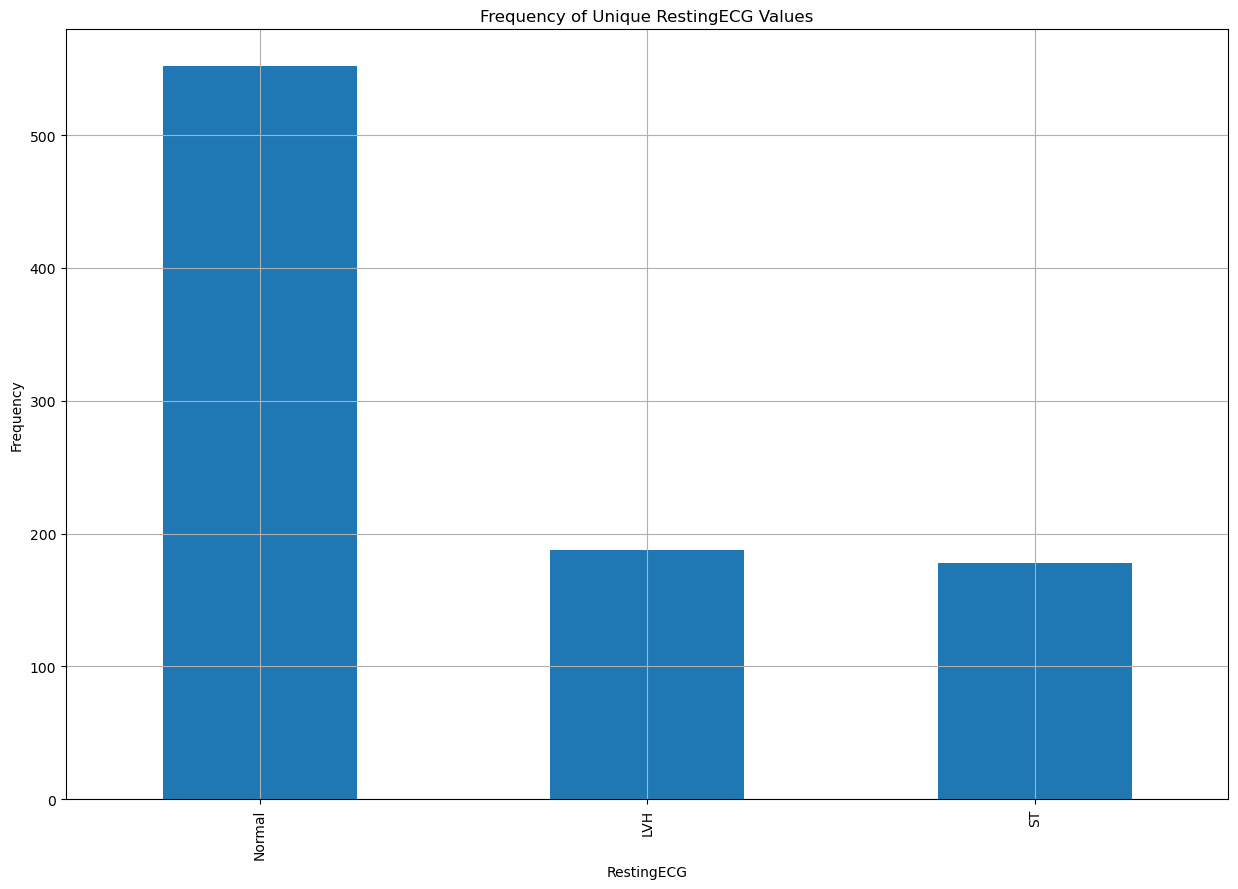

In [18]:
plt.figure(figsize=(15, 10))
RestingECG_counts = df['RestingECG'].value_counts()
RestingECG_counts.plot(kind='bar',grid=True)
plt.xlabel('RestingECG')
plt.ylabel('Frequency')
plt.title('Frequency of Unique RestingECG Values')
plt.show()

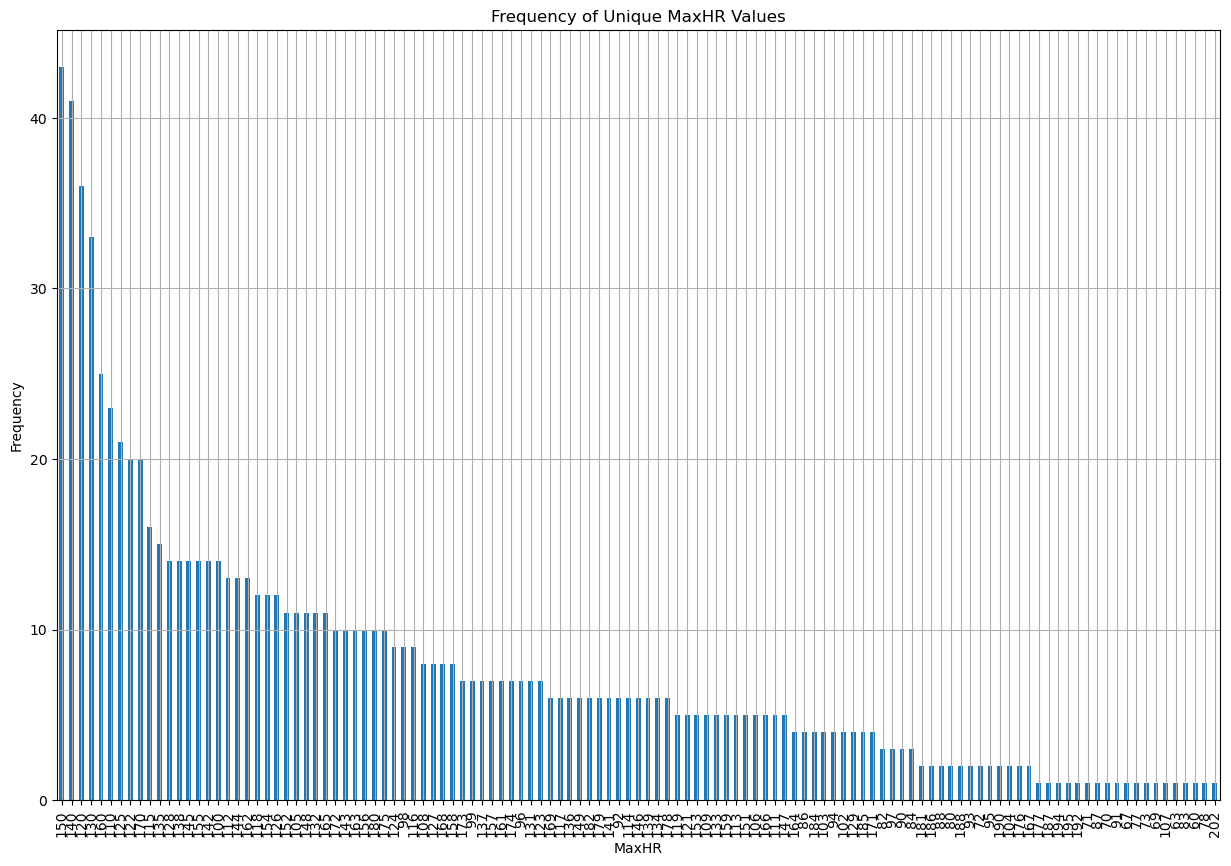

In [19]:
plt.figure(figsize=(15, 10))
MaxHR_counts = df['MaxHR'].value_counts()
MaxHR_counts.plot(kind='bar',grid=True)
plt.xlabel('MaxHR')
plt.ylabel('Frequency')
plt.title('Frequency of Unique MaxHR Values')
plt.show()

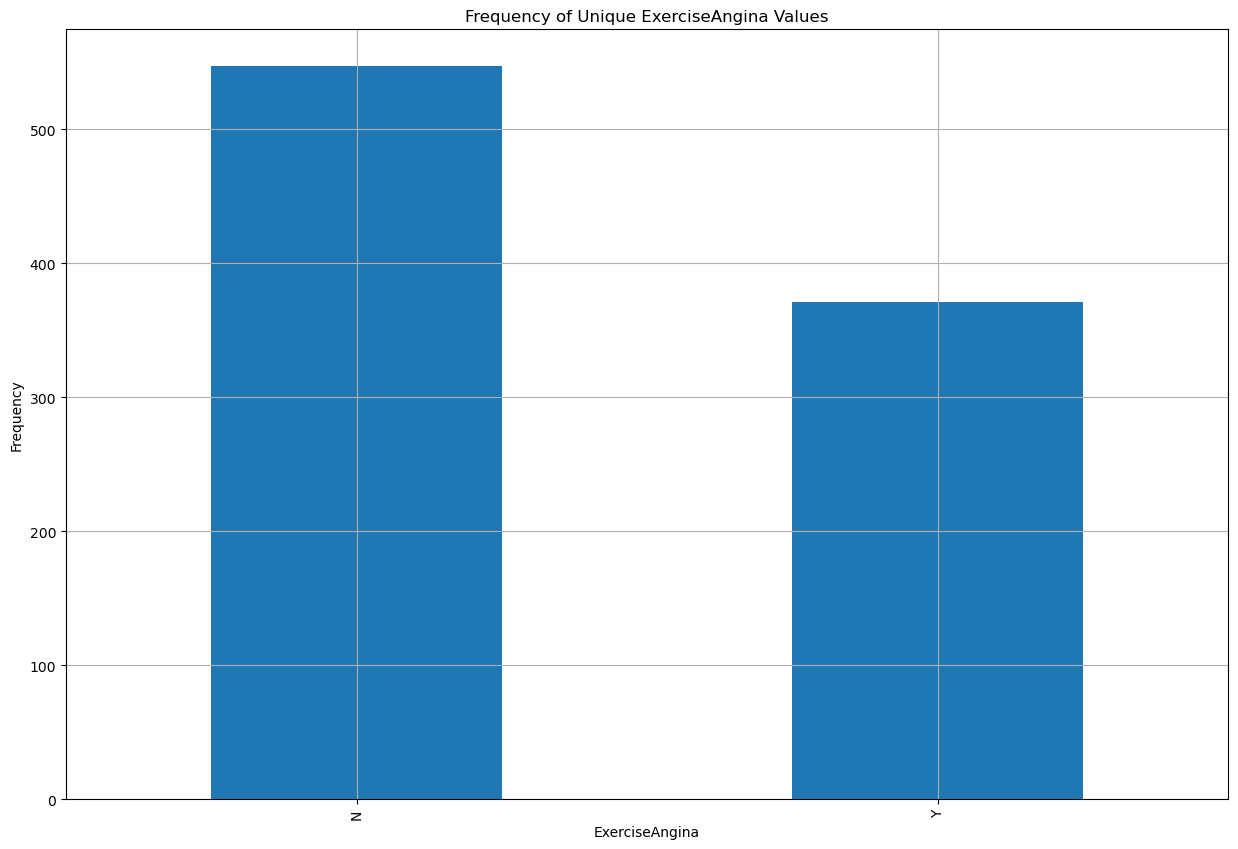

In [20]:
plt.figure(figsize=(15, 10))
ExerciseAngina_counts = df['ExerciseAngina'].value_counts()
ExerciseAngina_counts.plot(kind='bar',grid=True)
plt.xlabel('ExerciseAngina')
plt.ylabel('Frequency')
plt.title('Frequency of Unique ExerciseAngina Values')
plt.show()

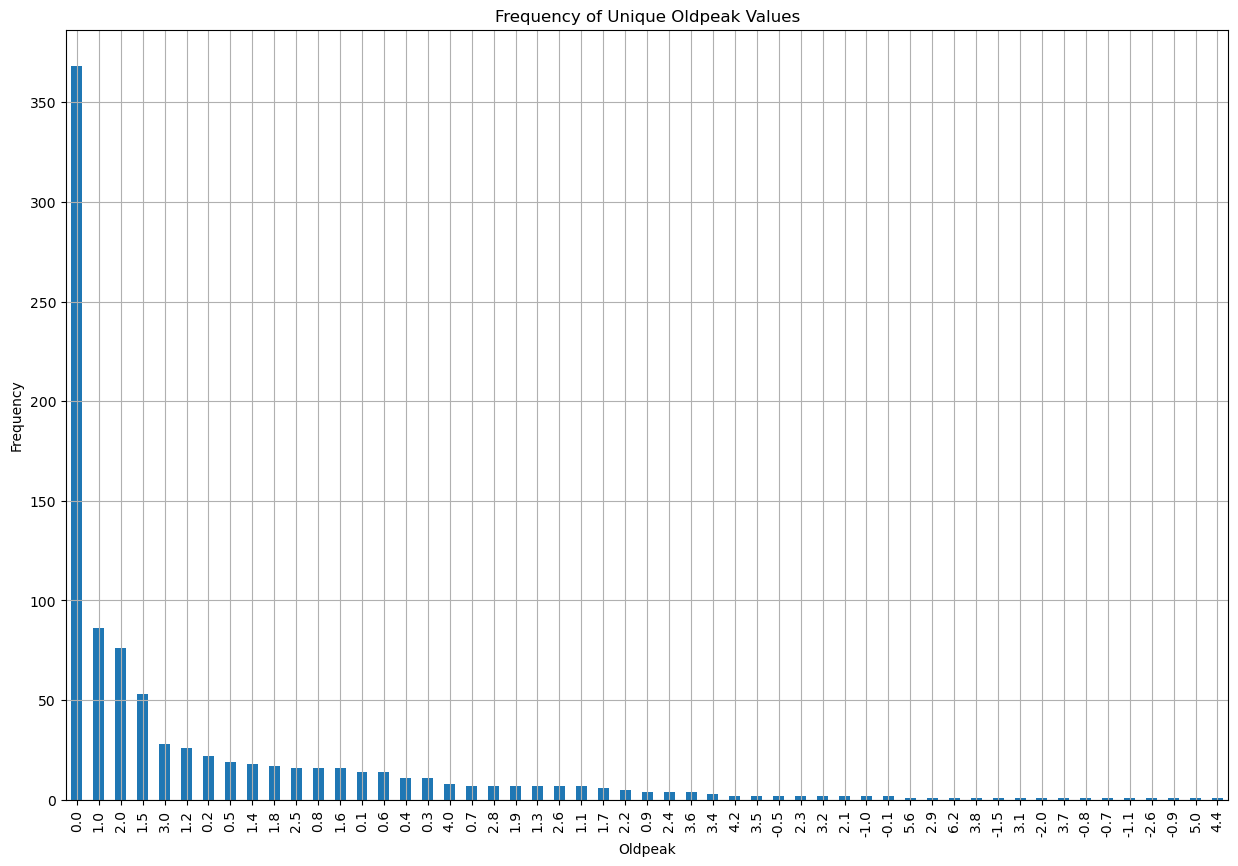

In [21]:
plt.figure(figsize=(15, 10))
Oldpeak_counts = df['Oldpeak'].value_counts()
Oldpeak_counts.plot(kind='bar',grid=True)
plt.xlabel('Oldpeak')
plt.ylabel('Frequency')
plt.title('Frequency of Unique Oldpeak Values')
plt.show()

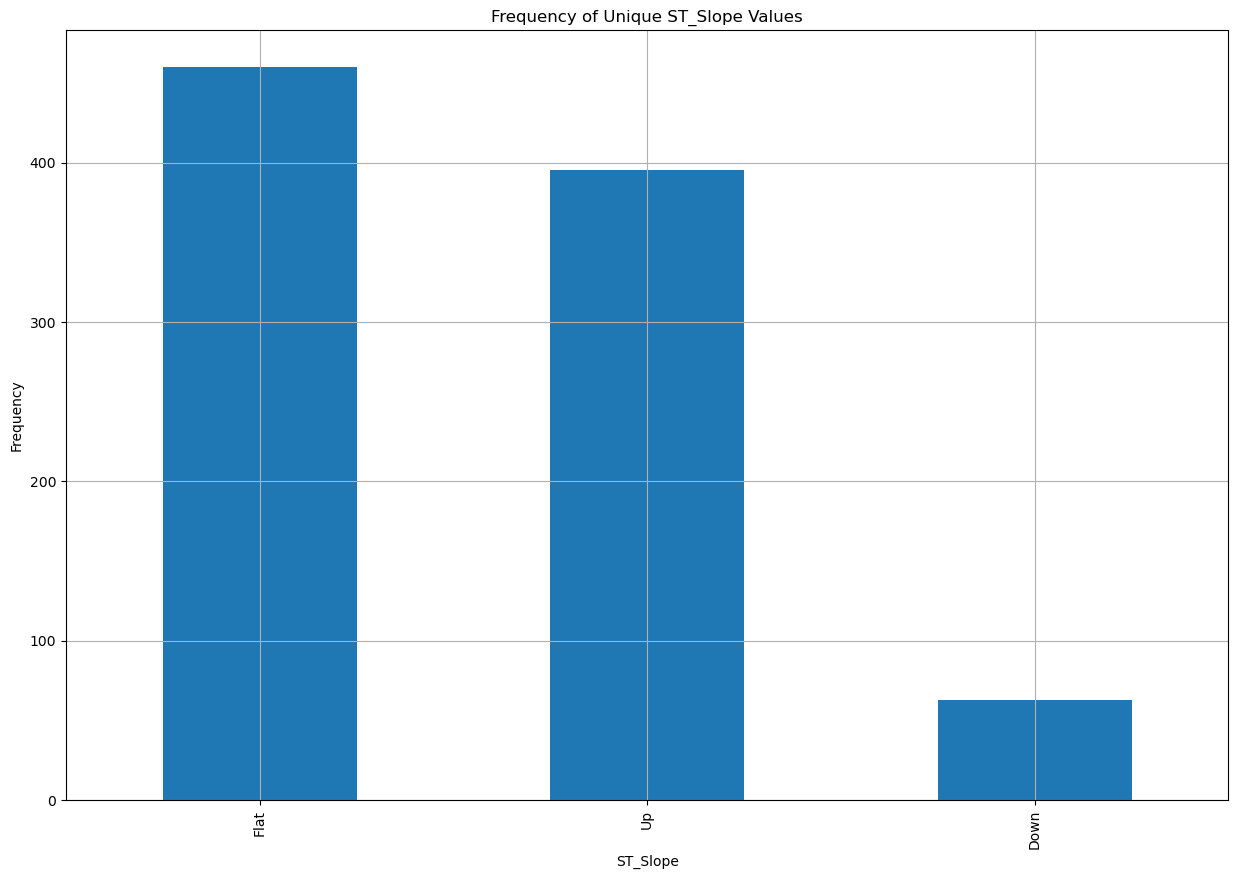

In [22]:
plt.figure(figsize=(15, 10))
ST_Slope_counts = df['ST_Slope'].value_counts()
ST_Slope_counts.plot(kind='bar', grid=True)
plt.xlabel('ST_Slope')
plt.ylabel('Frequency')
plt.title('Frequency of Unique ST_Slope Values')
plt.show()

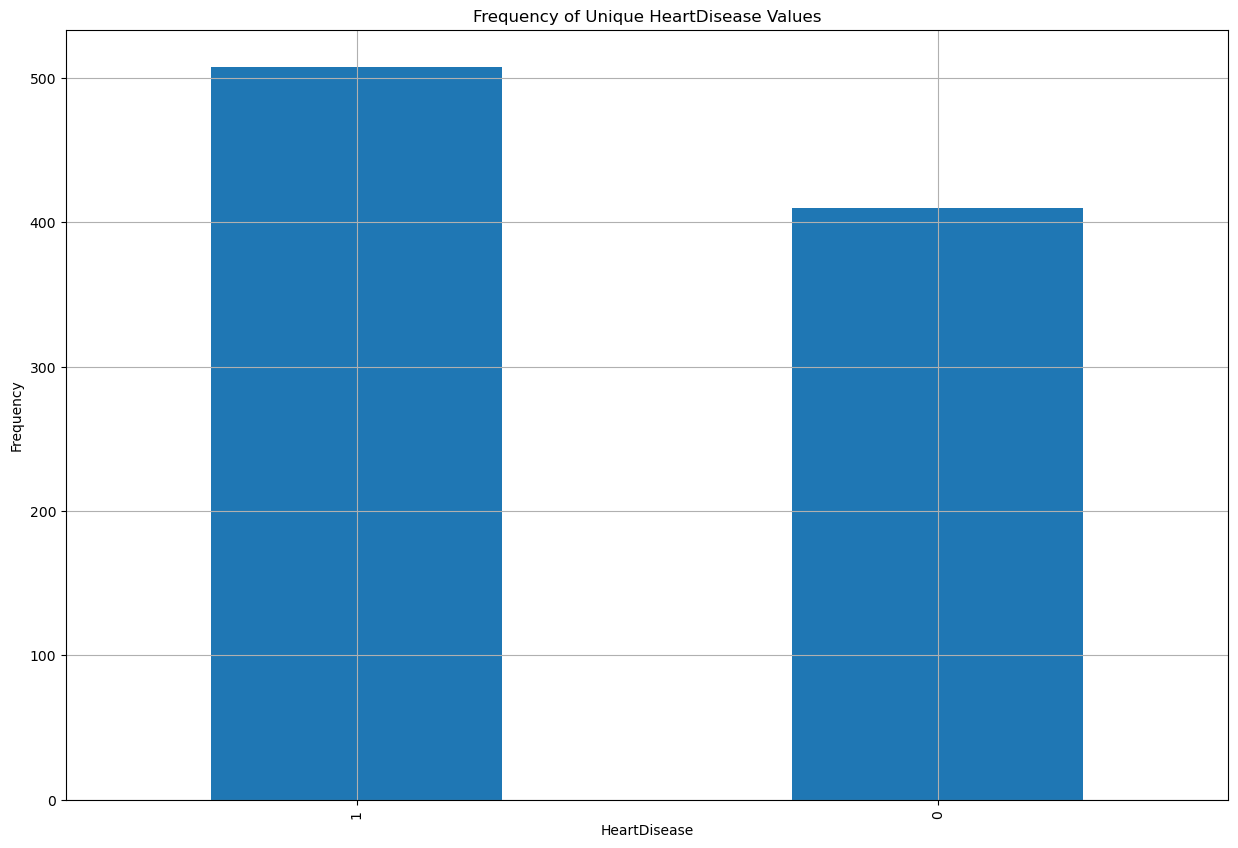

In [23]:
plt.figure(figsize=(15, 10))
HeartDisease_counts = df['HeartDisease'].value_counts()
HeartDisease_counts.plot(kind='bar', grid=True)
plt.xlabel('HeartDisease')
plt.ylabel('Frequency')
plt.title('Frequency of Unique HeartDisease Values')
plt.show()

In [24]:
df['Age'].unique()

array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
       56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
       29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71],
      dtype=int64)

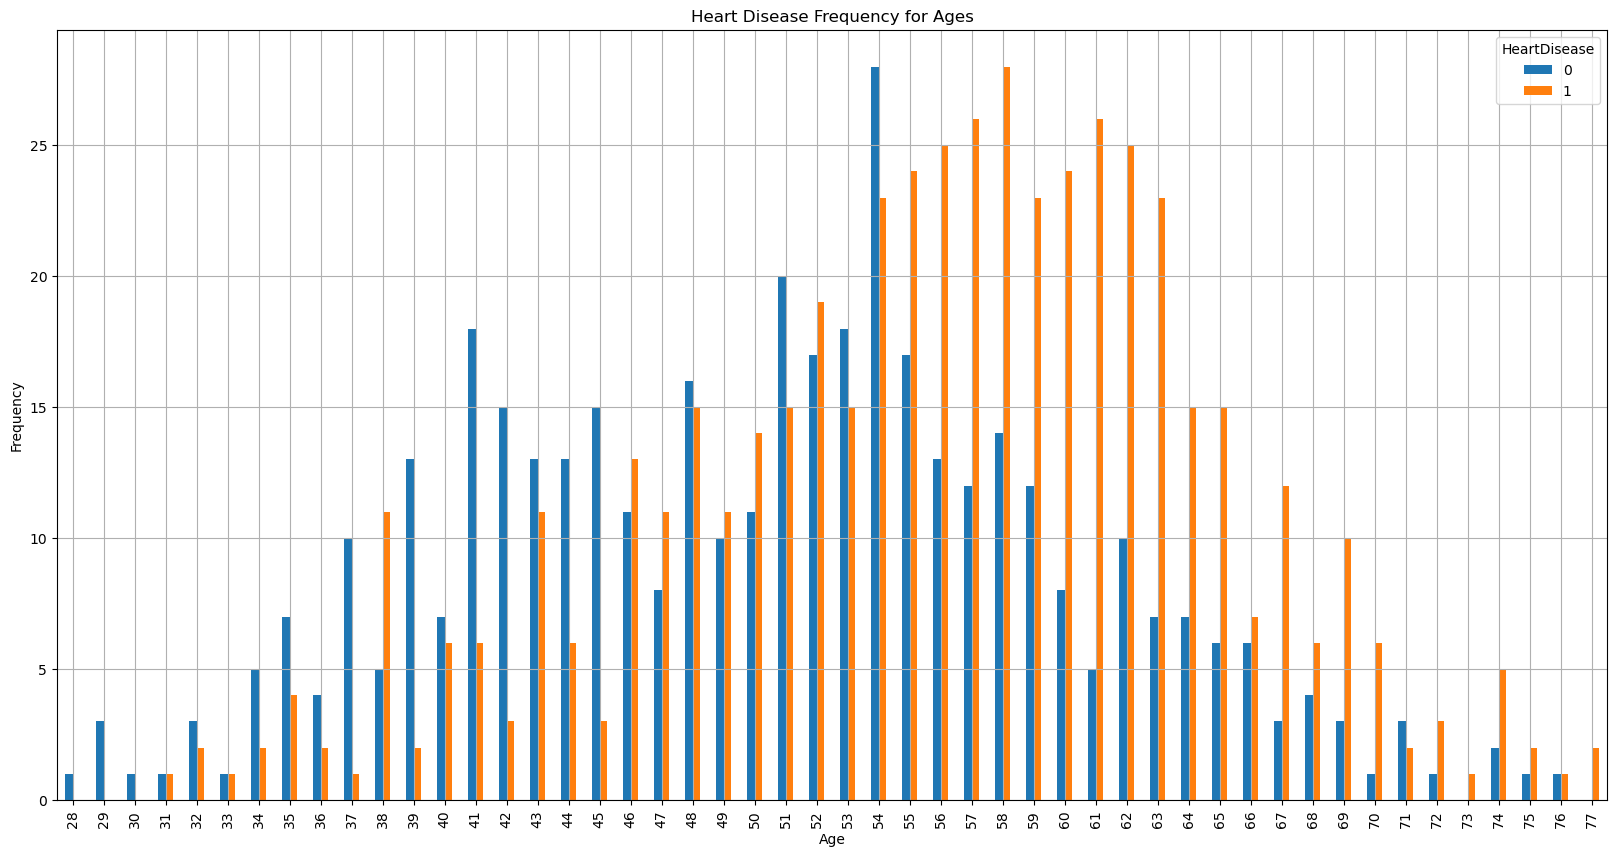

In [25]:
pd.crosstab(df.Age,df.HeartDisease).plot(kind="bar",figsize=(20,10),grid=True)
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## <span style="color:Black">Plot all features in the dataset to check distribution using a histogram</span></span>

Text(0.5, 1.0, 'Age distribuition')

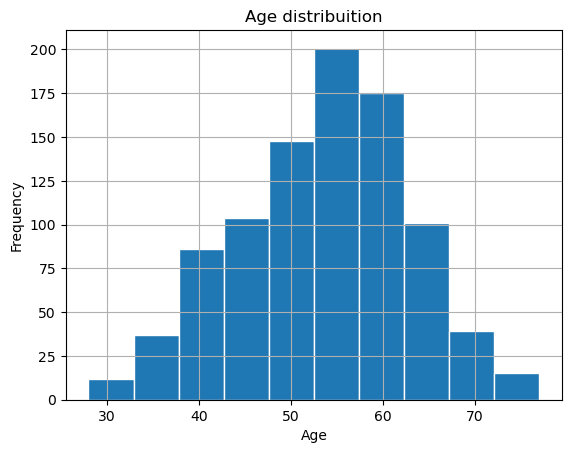

In [26]:
df.hist(column=['Age'],edgecolor='white')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribuition')

Text(0.5, 1.0, 'RestingBP_Distribution')

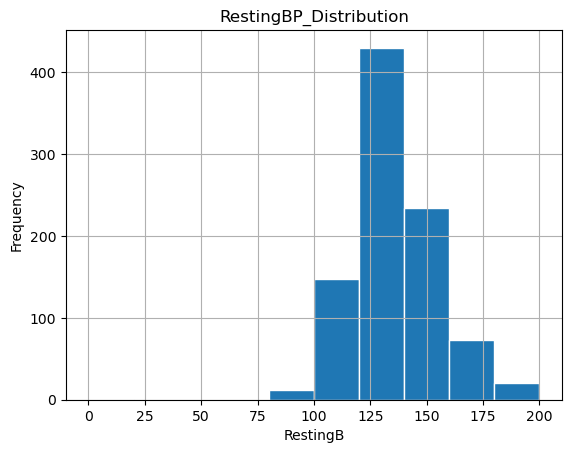

In [27]:
df.hist(column=['RestingBP'],edgecolor='white')
plt.xlabel('RestingB')
plt.ylabel('Frequency')
plt.title('RestingBP_Distribution')

Text(0.5, 1.0, 'FastingBS')

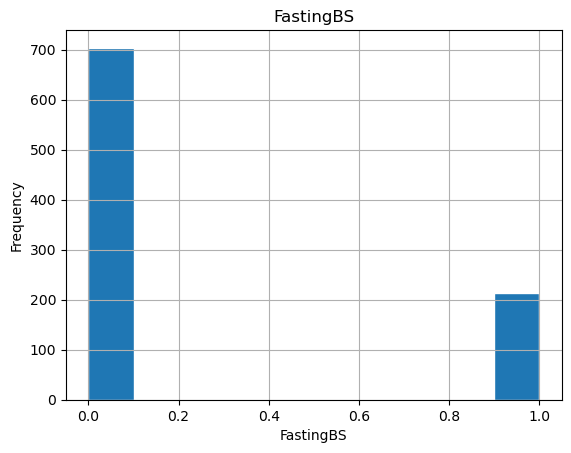

In [28]:
df.hist(column=['FastingBS'], edgecolor='white')
plt.xlabel('FastingBS')
plt.ylabel('Frequency')
plt.title('FastingBS')

Text(0.5, 1.0, 'MaxHR')

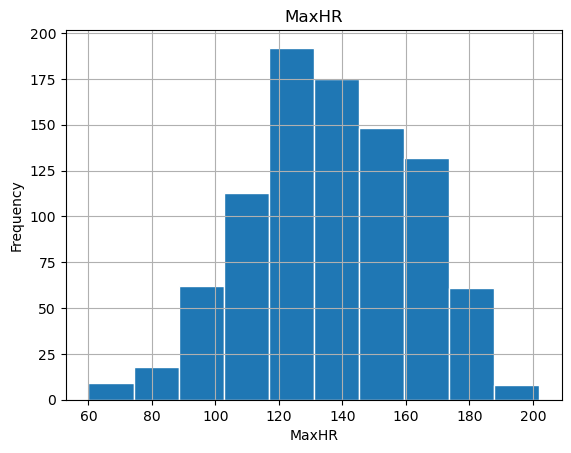

In [29]:
df.hist(column=['MaxHR'], bins=10, edgecolor='white')
plt.xlabel('MaxHR')
plt.ylabel('Frequency')
plt.title('MaxHR')

Text(0.5, 1.0, 'HeartDisease')

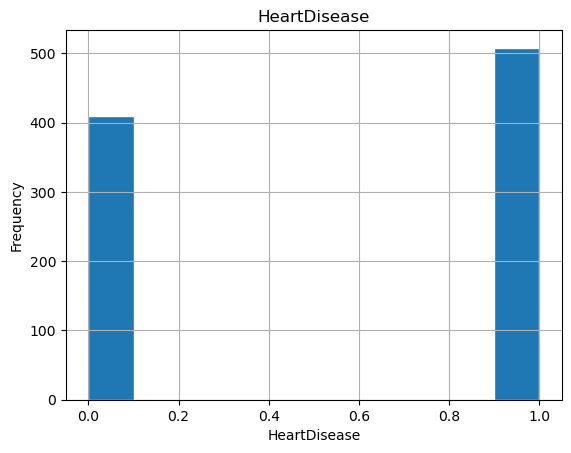

In [30]:
df.hist(column=['HeartDisease'], bins=10, edgecolor='white')
plt.xlabel('HeartDisease')
plt.ylabel('Frequency')
plt.title('HeartDisease')

Text(0.5, 0, 'Parameters')

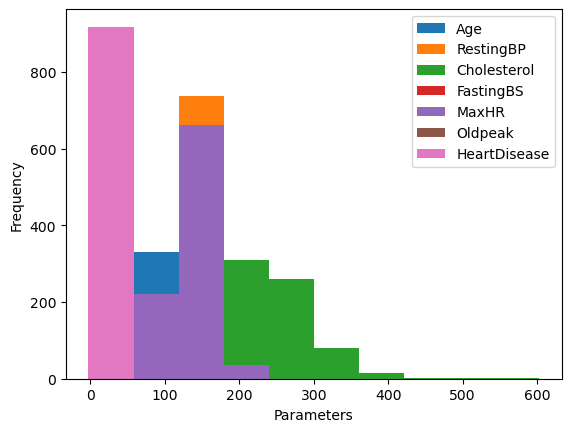

In [31]:
df.plot(kind='hist');
plt.xlabel('Parameters')

In [32]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**Observations**
- 
- The age distribution is also right skewed. there are few people with age greater than 40 who focus on their fitness.  
- Most of the customers are aged between 20 to 30, which signifies the people who are young tend to hit the gym more.

#### -  Use a correlation matrix to check for correlation between predictor variables

In [33]:
df.corr()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


#### Observation
- Age and HeartDisease have a moderate positive correlation of 0.282. This suggests that as age increases, the likelihood of having heart disease increases as well.
- MaxHR and HeartDisease have a moderate negative correlation of -0.400. This suggests that as maximum heart rate decreases, the likelihood of having heart disease increases.
- RestingBP and Age have a weak positive correlation of 0.254. This suggests that as resting blood pressure increases, the likelihood of being older also increases.
- Oldpeak and HeartDisease have a moderate positive correlation of 0.409. This suggests that as the magnitude of exercise-induced ST depression increases, the likelihood of having heart disease also increases.


#### Heatmap for Correlation

<AxesSubplot:>

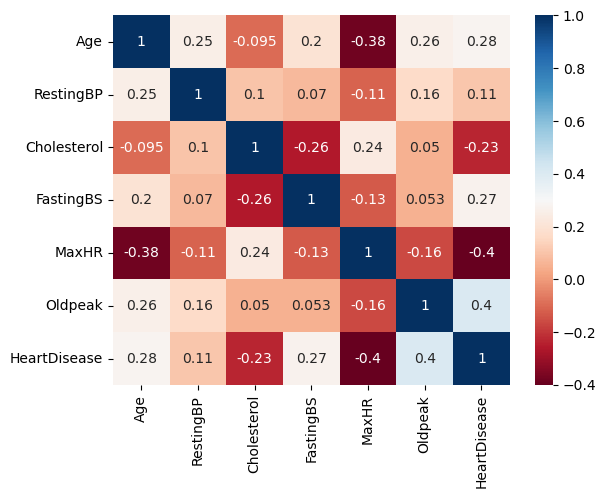

In [34]:
sns.heatmap(df.corr(),annot =True, cmap = 'RdBu')

#### observation- There is no corelation more than 0.5 we do not need to drop any feature.

# <span style="color:crimson">Q2.Feature Engineering</span>
- a) Check and drop duplicate and missing values, if it’s the case.
- b) Check and manage imbalance class, if needed.
- c) Check (Use boxplots) and take care of outliers (e.g. Cholesterol, Oldpeak) by
  completing imputation.
- d) Convert categorical data into numerical data using one-hot encoding or any other
  label encoding approach

### a.Checking the Missing Values

In [35]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [36]:
df.isnull().sum().sum()

0

- Observation: There is no Missing value in the given dataset

### Checking for Duplicate values 

In [37]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool

In [38]:
df.duplicated().sum()

0

- Obesrvation: There is no duplicate value in the dataset

### b. Check and manage imbalance class

In [39]:
countNoDisease = len(df[df.HeartDisease == 0])
countHaveDisease = len(df[df.HeartDisease == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.HeartDisease))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.HeartDisease))*100)))

Percentage of Patients Haven't Heart Disease: 44.66%
Percentage of Patients Have Heart Disease: 55.34%


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

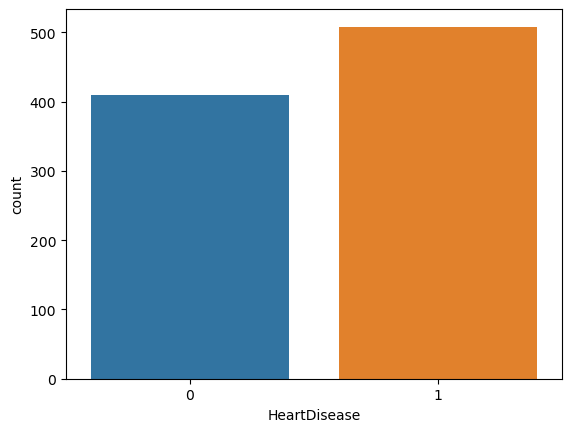

In [40]:
sns.countplot(x = 'HeartDisease', data=df)

#### Observation - In our dataset 55.345% data is of patients with heart disease and 44.6% patient with no heart disease so this data set is quite balance.

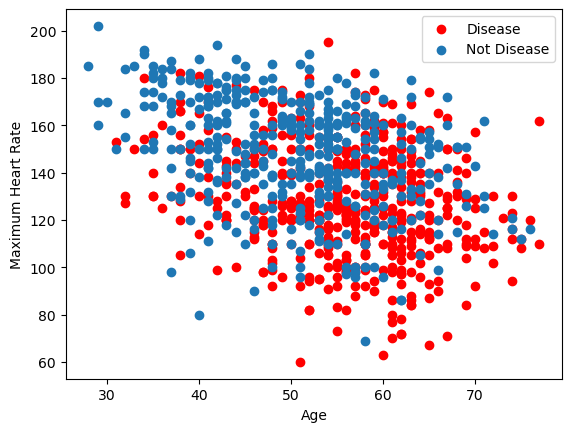

In [41]:
plt.scatter(x=df.Age[df.HeartDisease==1], y=df.MaxHR[(df.HeartDisease==1)], c="red")
plt.scatter(x=df.Age[df.HeartDisease==0], y=df.MaxHR[(df.HeartDisease==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

### c. Check (Use boxplots) and take care of outliers 

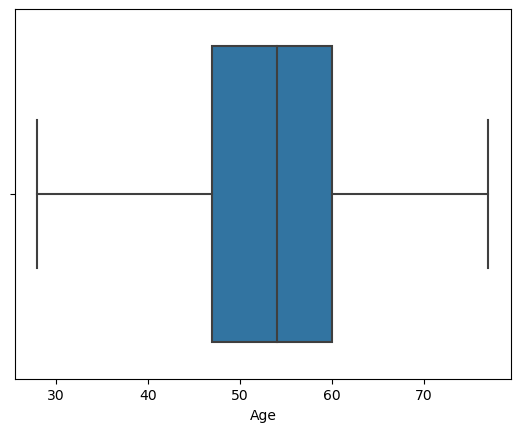

In [42]:
sns.boxplot(df.Age, data=df)
plt.show()

#### No outliers in Age Data

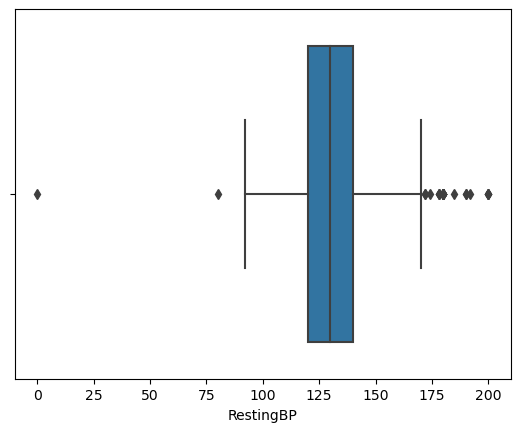

In [43]:
sns.boxplot(df.RestingBP, data=df)
plt.show()

There is outliers in RestingBP but before considering any data point as Outlier we must have domain knowledge and a we a proper justification.

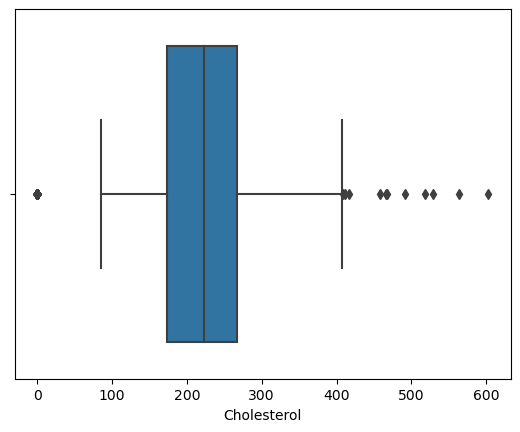

In [44]:
sns.boxplot(df.Cholesterol,data=df)
plt.show()

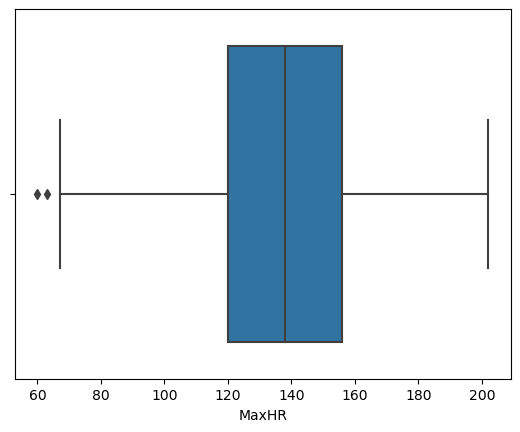

In [45]:
sns.boxplot(df.MaxHR, data=df)
plt.show()

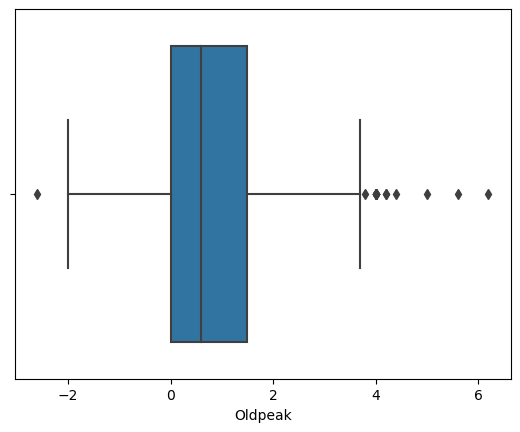

In [46]:
sns.boxplot(df.Oldpeak, data=df)
plt.show()

#### Obervation
- Oldpeak contains some outliers that could be removed. But without domain knowledge its hard to decide whether a outlier could be dropped or not.
- The values were only dropped for the purpose of practicing data imputation.


#### Imputation of Oldpaeak and cholesterol
 - If the data is skewed or contains significant outliers, the median may be a better choice for imputation. The median is less affected by outliers and extreme values, which can provide a more accurate estimate of the typical value in such cases. Therefore, it is important to examine the distribution of the variables in question and select the appropriate imputation method based on whether the data is normally distributed or skewed, and whether there are significant outliers present.

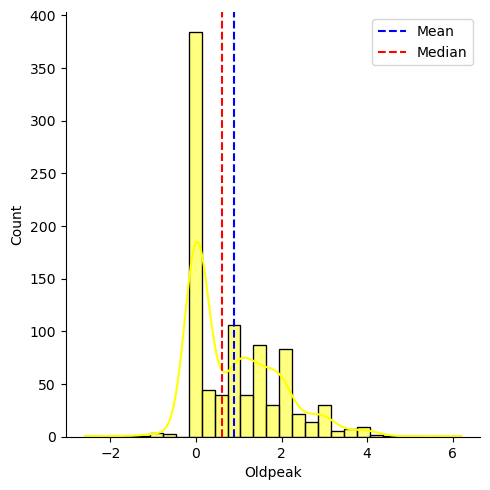

In [47]:
sns.displot(data=df,color='yellow', x='Oldpeak', kde=True)
mean = df['Oldpeak'].mean()
median = df['Oldpeak'].median()
plt.axvline(mean, color='blue', linestyle='--', label='Mean')
plt.axvline(median, color='red', linestyle='--', label='Median')
plt.legend()
plt.show() 


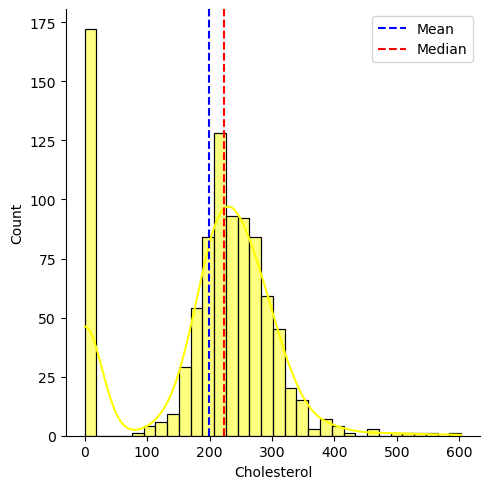

In [48]:
sns.displot(data=df,color='yellow', x='Cholesterol', kde=True)
mean = df['Cholesterol'].mean()
median = df['Cholesterol'].median()
plt.axvline(mean, color='blue', linestyle='--', label='Mean')
plt.axvline(median, color='red', linestyle='--', label='Median')
plt.legend()
plt.show()

####  In our dataset dataset is skrewed so i should choose median over mean to get better result. As mean is affected by outliers so overall result could not be precise.

### Imputation of Oldpeak

In [49]:
Oldpeak_median = df['Oldpeak'].median()

df.loc[df['Oldpeak'] >= 5, 'Oldpeak'] = Oldpeak_median
df.loc[df['Oldpeak'] < -2, 'Oldpeak'] = Oldpeak_median

### Imputation of cholestrol

In [50]:
Cholesterol_median = df['Cholesterol'].median()
df.loc[df['Cholesterol'] > 450, 'Cholesterol'] = Cholesterol_median
df.loc[df['Cholesterol'] < 50, 'Cholesterol'] = Cholesterol_median

### Imputation of RestingBP

In [51]:
RestingBP_median = df['RestingBP'].median()
df.loc[df['RestingBP'] > 180, 'RestingBP'] = RestingBP_median
df.loc[df['RestingBP'] < 110, 'RestingBP'] = RestingBP_median

### Data Distribution After imputation

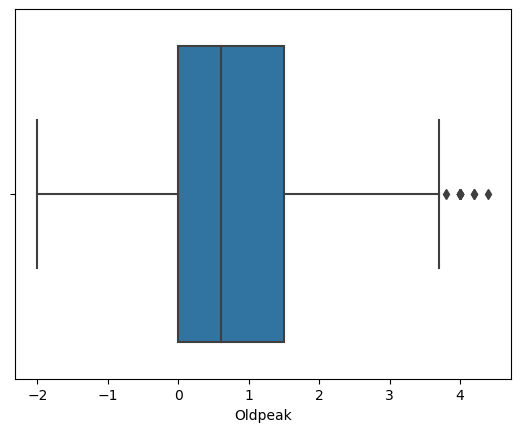

In [52]:
sns.boxplot(df.Oldpeak, data=df)
plt.show()

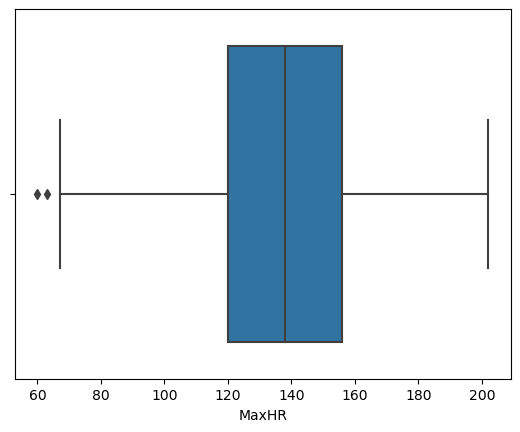

In [53]:
sns.boxplot(df.MaxHR, data=df)
plt.show()

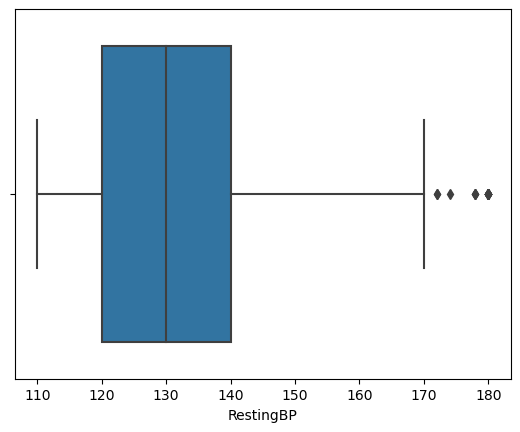

In [54]:
sns.boxplot(df.RestingBP, data=df)
plt.show()

- Obseravation as we can see there are still outliers but removing or changing all the data is not good practice

### Categorical Data into numerical data
- one hot encoding

In [55]:
df = pd.get_dummies(df)

In [56]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


### e. Rescale features to a narrow range using a normalization or standardization function

### Normalization feature
- The MinMaxScaler scales the data to a fixed range (usually between 0 and 1), by subtracting the minimum value of the feature and dividing by the range (the maximum value minus the minimum value).

In [57]:
scaler = MinMaxScaler()

# transform the data
normalized_data = scaler.fit_transform(df)
# New data frame with the normalized data
df = pd.DataFrame(normalized_data, columns=df.columns)

In [58]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.428571,0.614458,0.0,0.788732,0.312500,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.714286,0.286145,0.0,0.676056,0.468750,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.285714,0.596386,0.0,0.267606,0.312500,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.408163,0.400000,0.388554,0.0,0.338028,0.546875,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.530612,0.571429,0.331325,0.0,0.436620,0.312500,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


# <span style="color:red">Data Modeling</span>
- a) Partition your data in test (30%) and training (70%).
- b) Use KNN, SVM, and Decision Tree Classifier classifiers to predict the class. 

###   Data Splitting
- the code performs a train-test split on the original dataset by separating the target variable from the input features and then splitting the data into a training set and a testing set using the train_test_split function.
- The resulting x_train, x_test, y_train, and y_test variables can be used to train and evaluate machine learning models.

In [59]:
x = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=0.3)

In [60]:
x_train.shape

(642, 20)

In [61]:
x_test.shape

(276, 20)

### K-Nearest Neighbour (KNN)
- The algorithm works by taking the value of the k nearest neighbors of a given data point and using their values to predict the label or value of the data point. The distance metric used to calculate the distance between the data points can vary, but the most commonly used distance metrics are Euclidean distance and Manhattan distance.

In [62]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

TrainAC = accuracy_score(y_train, KNN.predict(x_train))                 
TrainCM = confusion_matrix(y_train,KNN.predict(x_train))
TrainCR = classification_report(y_train,KNN.predict(x_train))

print(f"Train Accuracy score:{TrainAC}\nTrain Confusion Matrix:\n{TrainCM}\n Train Classification report:\n{TrainCR}")

TestAC = accuracy_score(y_test, KNN.predict(x_test))                 
TestCM = confusion_matrix(y_test,KNN.predict(x_test))
TestCR = classification_report(y_test,KNN.predict(x_test))

print(f"Test Accuracy score:{TestAC}\n Test Confusion Matrix:\n{TestCM}\n Test Classification report:\n{TestCR}")

Train Accuracy score:0.8707165109034268
Train Confusion Matrix:
[[233  51]
 [ 32 326]]
 Train Classification report:
              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85       284
         1.0       0.86      0.91      0.89       358

    accuracy                           0.87       642
   macro avg       0.87      0.87      0.87       642
weighted avg       0.87      0.87      0.87       642

Test Accuracy score:0.855072463768116
 Test Confusion Matrix:
[[101  25]
 [ 15 135]]
 Test Classification report:
              precision    recall  f1-score   support

         0.0       0.87      0.80      0.83       126
         1.0       0.84      0.90      0.87       150

    accuracy                           0.86       276
   macro avg       0.86      0.85      0.85       276
weighted avg       0.86      0.86      0.85       276



#### Obsevation
The accuracy score for the training set is 0.87, which means that the model correctly classified 87% of the samples in the training set.

The accuracy score for the testing set is 0.855, which means that the model correctly classified 85.5% of the samples in the testing set.

### Hyper Parameter Tuning


In [76]:
Trainaccuracy=[]
Testaccuracy=[]

for i in range(1,50):
    KNN=KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train,y_train)
    
    tra=KNN.score(x_train,y_train)
    tsa=KNN.score(x_test,y_test)
    
    Trainaccuracy.append(tra)
    Testaccuracy.append(tsa)

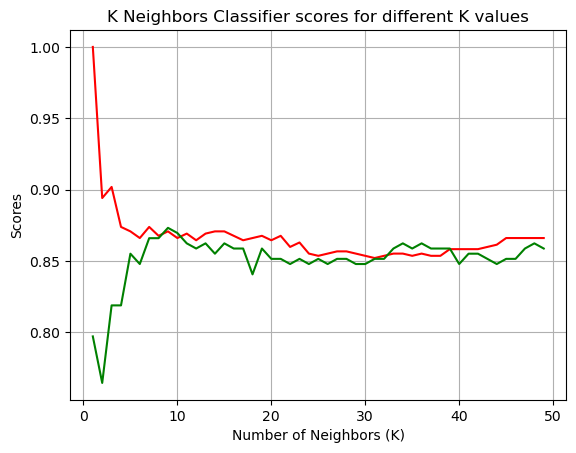

In [79]:
plt.plot(range(1,50),Trainaccuracy,color="RED")
plt.plot(range(1,50),Testaccuracy,color="Green")
plt.title('K Neighbors Classifier scores for different K values')
plt.ylabel('Scores')
plt.xlabel('Number of Neighbors (K)')
plt.grid()
plt.show()

In [80]:
KNN=KNeighborsClassifier(n_neighbors=7)
KNN.fit(x_train,y_train)
     
tr=KNN.score(x_train,y_train)
te=KNN.score(x_test,y_test)
     
Trainaccuracy.append(tr)
Testaccuracy.append(te)
print(f"Training acc: {tr}\nTesting acc:{te}")

Training acc: 0.8738317757009346
Testing acc:0.8659420289855072


## SVM Modeling 
- There are multiple kernel options available when using Support Vector Classifier, and I plan to evaluate several of them to determine which kernel yields the best score.

In [82]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
y_predict =svm.predict(x_test)

In [83]:
TrainAC = accuracy_score(y_train, svm.predict(x_train))                 
TrainCM = confusion_matrix(y_train,svm.predict(x_train))
TrainCR = classification_report(y_train,svm.predict(x_train))

print(f"Train Accuracy score:{TrainAC}\nTrain Confusion Matrix:\n{TrainCM}\n Train Classification report:\n{TrainCR}")

TestAC = accuracy_score(y_test, svm.predict(x_test))                 
TestCM = confusion_matrix(y_test,svm.predict(x_test))
TestCR = classification_report(y_test,svm.predict(x_test))

print(f"Test Accuracy score:{TestAC}\n Test Confusion Matrix:\n{TestCM}\n Test Classification report:\n{TestCR}")

Train Accuracy score:0.8847352024922118
Train Confusion Matrix:
[[240  44]
 [ 30 328]]
 Train Classification report:
              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87       284
         1.0       0.88      0.92      0.90       358

    accuracy                           0.88       642
   macro avg       0.89      0.88      0.88       642
weighted avg       0.88      0.88      0.88       642

Test Accuracy score:0.8514492753623188
 Test Confusion Matrix:
[[100  26]
 [ 15 135]]
 Test Classification report:
              precision    recall  f1-score   support

         0.0       0.87      0.79      0.83       126
         1.0       0.84      0.90      0.87       150

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



# Decision Tree Classification

In [69]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(max_depth=5)
Tree.fit(x_train,y_train)

TrainAC = accuracy_score(y_train, Tree.predict(x_train))                 
TrainCM = confusion_matrix(y_train,Tree.predict(x_train))
TrainCR = classification_report(y_train,Tree.predict(x_train))

print(f"Train Accuracy score:{TrainAC}\nTrain Confusion Matrix:\n{TrainCM}\n Train Classification report:\n{TrainCR}")

TestAC = accuracy_score(y_test, Tree.predict(x_test))                 
TestCM = confusion_matrix(y_test,Tree.predict(x_test))
TestCR = classification_report(y_test,Tree.predict(x_test))

print(f"Test Accuracy score:{TestAC}\n Test Confusion Matrix:\n{TestCM}\n Test Classification report:\n{TestCR}")

Train Accuracy score:0.9080996884735203
Train Confusion Matrix:
[[260  24]
 [ 35 323]]
 Train Classification report:
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90       284
         1.0       0.93      0.90      0.92       358

    accuracy                           0.91       642
   macro avg       0.91      0.91      0.91       642
weighted avg       0.91      0.91      0.91       642

Test Accuracy score:0.8369565217391305
 Test Confusion Matrix:
[[103  23]
 [ 22 128]]
 Test Classification report:
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82       126
         1.0       0.85      0.85      0.85       150

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



## Model evaluation and Selection

In [92]:
grid = GridSearchCV(DecisionTreeClassifier(),param_dict,cv=10,n_jobs=-1,verbose=3)
grid.fit(x_train,y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=3)

### Grid search for best Parameters

In [84]:
parameter={
    "criterion":["gini","entropy"],
    "max_depth":[1, 3, 5, 7, 9],
    "min_samples_leaf":list(range(2,20))
}
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(DecisionTreeClassifier(),parameter,verbose=10)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5; 1/180] START criterion=gini, max_depth=1, min_samples_leaf=2...........
[CV 1/5; 1/180] END criterion=gini, max_depth=1, min_samples_leaf=2;, score=0.791 total time=   0.0s
[CV 2/5; 1/180] START criterion=gini, max_depth=1, min_samples_leaf=2...........
[CV 2/5; 1/180] END criterion=gini, max_depth=1, min_samples_leaf=2;, score=0.829 total time=   0.0s
[CV 3/5; 1/180] START criterion=gini, max_depth=1, min_samples_leaf=2...........
[CV 3/5; 1/180] END criterion=gini, max_depth=1, min_samples_leaf=2;, score=0.797 total time=   0.0s
[CV 4/5; 1/180] START criterion=gini, max_depth=1, min_samples_leaf=2...........
[CV 4/5; 1/180] END criterion=gini, max_depth=1, min_samples_leaf=2;, score=0.766 total time=   0.0s
[CV 5/5; 1/180] START criterion=gini, max_depth=1, min_samples_leaf=2...........
[CV 5/5; 1/180] END criterion=gini, max_depth=1, min_samples_leaf=2;, score=0.812 total time=   0.0s
[CV 1/5; 2/180] START crite

[CV 1/5; 15/180] END criterion=gini, max_depth=1, min_samples_leaf=16;, score=0.791 total time=   0.0s
[CV 2/5; 15/180] START criterion=gini, max_depth=1, min_samples_leaf=16.........
[CV 2/5; 15/180] END criterion=gini, max_depth=1, min_samples_leaf=16;, score=0.829 total time=   0.0s
[CV 3/5; 15/180] START criterion=gini, max_depth=1, min_samples_leaf=16.........
[CV 3/5; 15/180] END criterion=gini, max_depth=1, min_samples_leaf=16;, score=0.797 total time=   0.0s
[CV 4/5; 15/180] START criterion=gini, max_depth=1, min_samples_leaf=16.........
[CV 4/5; 15/180] END criterion=gini, max_depth=1, min_samples_leaf=16;, score=0.766 total time=   0.0s
[CV 5/5; 15/180] START criterion=gini, max_depth=1, min_samples_leaf=16.........
[CV 5/5; 15/180] END criterion=gini, max_depth=1, min_samples_leaf=16;, score=0.812 total time=   0.0s
[CV 1/5; 16/180] START criterion=gini, max_depth=1, min_samples_leaf=17.........
[CV 1/5; 16/180] END criterion=gini, max_depth=1, min_samples_leaf=17;, score=0.

[CV 2/5; 27/180] END criterion=gini, max_depth=3, min_samples_leaf=10;, score=0.876 total time=   0.0s
[CV 3/5; 27/180] START criterion=gini, max_depth=3, min_samples_leaf=10.........
[CV 3/5; 27/180] END criterion=gini, max_depth=3, min_samples_leaf=10;, score=0.859 total time=   0.0s
[CV 4/5; 27/180] START criterion=gini, max_depth=3, min_samples_leaf=10.........
[CV 4/5; 27/180] END criterion=gini, max_depth=3, min_samples_leaf=10;, score=0.836 total time=   0.0s
[CV 5/5; 27/180] START criterion=gini, max_depth=3, min_samples_leaf=10.........
[CV 5/5; 27/180] END criterion=gini, max_depth=3, min_samples_leaf=10;, score=0.828 total time=   0.0s
[CV 1/5; 28/180] START criterion=gini, max_depth=3, min_samples_leaf=11.........
[CV 1/5; 28/180] END criterion=gini, max_depth=3, min_samples_leaf=11;, score=0.853 total time=   0.0s
[CV 2/5; 28/180] START criterion=gini, max_depth=3, min_samples_leaf=11.........
[CV 2/5; 28/180] END criterion=gini, max_depth=3, min_samples_leaf=11;, score=0.

[CV 3/5; 40/180] END criterion=gini, max_depth=5, min_samples_leaf=5;, score=0.844 total time=   0.0s
[CV 4/5; 40/180] START criterion=gini, max_depth=5, min_samples_leaf=5..........
[CV 4/5; 40/180] END criterion=gini, max_depth=5, min_samples_leaf=5;, score=0.875 total time=   0.0s
[CV 5/5; 40/180] START criterion=gini, max_depth=5, min_samples_leaf=5..........
[CV 5/5; 40/180] END criterion=gini, max_depth=5, min_samples_leaf=5;, score=0.828 total time=   0.0s
[CV 1/5; 41/180] START criterion=gini, max_depth=5, min_samples_leaf=6..........
[CV 1/5; 41/180] END criterion=gini, max_depth=5, min_samples_leaf=6;, score=0.806 total time=   0.0s
[CV 2/5; 41/180] START criterion=gini, max_depth=5, min_samples_leaf=6..........
[CV 2/5; 41/180] END criterion=gini, max_depth=5, min_samples_leaf=6;, score=0.837 total time=   0.0s
[CV 3/5; 41/180] START criterion=gini, max_depth=5, min_samples_leaf=6..........
[CV 3/5; 41/180] END criterion=gini, max_depth=5, min_samples_leaf=6;, score=0.852 to

[CV 1/5; 55/180] END criterion=gini, max_depth=7, min_samples_leaf=2;, score=0.798 total time=   0.0s
[CV 2/5; 55/180] START criterion=gini, max_depth=7, min_samples_leaf=2..........
[CV 2/5; 55/180] END criterion=gini, max_depth=7, min_samples_leaf=2;, score=0.829 total time=   0.0s
[CV 3/5; 55/180] START criterion=gini, max_depth=7, min_samples_leaf=2..........
[CV 3/5; 55/180] END criterion=gini, max_depth=7, min_samples_leaf=2;, score=0.766 total time=   0.0s
[CV 4/5; 55/180] START criterion=gini, max_depth=7, min_samples_leaf=2..........
[CV 4/5; 55/180] END criterion=gini, max_depth=7, min_samples_leaf=2;, score=0.789 total time=   0.0s
[CV 5/5; 55/180] START criterion=gini, max_depth=7, min_samples_leaf=2..........
[CV 5/5; 55/180] END criterion=gini, max_depth=7, min_samples_leaf=2;, score=0.836 total time=   0.0s
[CV 1/5; 56/180] START criterion=gini, max_depth=7, min_samples_leaf=3..........
[CV 1/5; 56/180] END criterion=gini, max_depth=7, min_samples_leaf=3;, score=0.822 to

[CV 3/5; 67/180] END criterion=gini, max_depth=7, min_samples_leaf=14;, score=0.883 total time=   0.0s
[CV 4/5; 67/180] START criterion=gini, max_depth=7, min_samples_leaf=14.........
[CV 4/5; 67/180] END criterion=gini, max_depth=7, min_samples_leaf=14;, score=0.820 total time=   0.0s
[CV 5/5; 67/180] START criterion=gini, max_depth=7, min_samples_leaf=14.........
[CV 5/5; 67/180] END criterion=gini, max_depth=7, min_samples_leaf=14;, score=0.844 total time=   0.0s
[CV 1/5; 68/180] START criterion=gini, max_depth=7, min_samples_leaf=15.........
[CV 1/5; 68/180] END criterion=gini, max_depth=7, min_samples_leaf=15;, score=0.868 total time=   0.0s
[CV 2/5; 68/180] START criterion=gini, max_depth=7, min_samples_leaf=15.........
[CV 2/5; 68/180] END criterion=gini, max_depth=7, min_samples_leaf=15;, score=0.845 total time=   0.0s
[CV 3/5; 68/180] START criterion=gini, max_depth=7, min_samples_leaf=15.........
[CV 3/5; 68/180] END criterion=gini, max_depth=7, min_samples_leaf=15;, score=0.

[CV 4/5; 79/180] END criterion=gini, max_depth=9, min_samples_leaf=8;, score=0.812 total time=   0.0s
[CV 5/5; 79/180] START criterion=gini, max_depth=9, min_samples_leaf=8..........
[CV 5/5; 79/180] END criterion=gini, max_depth=9, min_samples_leaf=8;, score=0.844 total time=   0.0s
[CV 1/5; 80/180] START criterion=gini, max_depth=9, min_samples_leaf=9..........
[CV 1/5; 80/180] END criterion=gini, max_depth=9, min_samples_leaf=9;, score=0.814 total time=   0.0s
[CV 2/5; 80/180] START criterion=gini, max_depth=9, min_samples_leaf=9..........
[CV 2/5; 80/180] END criterion=gini, max_depth=9, min_samples_leaf=9;, score=0.853 total time=   0.0s
[CV 3/5; 80/180] START criterion=gini, max_depth=9, min_samples_leaf=9..........
[CV 3/5; 80/180] END criterion=gini, max_depth=9, min_samples_leaf=9;, score=0.875 total time=   0.0s
[CV 4/5; 80/180] START criterion=gini, max_depth=9, min_samples_leaf=9..........
[CV 4/5; 80/180] END criterion=gini, max_depth=9, min_samples_leaf=9;, score=0.859 to

[CV 5/5; 94/180] END criterion=entropy, max_depth=1, min_samples_leaf=5;, score=0.812 total time=   0.0s
[CV 1/5; 95/180] START criterion=entropy, max_depth=1, min_samples_leaf=6.......
[CV 1/5; 95/180] END criterion=entropy, max_depth=1, min_samples_leaf=6;, score=0.791 total time=   0.0s
[CV 2/5; 95/180] START criterion=entropy, max_depth=1, min_samples_leaf=6.......
[CV 2/5; 95/180] END criterion=entropy, max_depth=1, min_samples_leaf=6;, score=0.829 total time=   0.0s
[CV 3/5; 95/180] START criterion=entropy, max_depth=1, min_samples_leaf=6.......
[CV 3/5; 95/180] END criterion=entropy, max_depth=1, min_samples_leaf=6;, score=0.797 total time=   0.0s
[CV 4/5; 95/180] START criterion=entropy, max_depth=1, min_samples_leaf=6.......
[CV 4/5; 95/180] END criterion=entropy, max_depth=1, min_samples_leaf=6;, score=0.766 total time=   0.0s
[CV 5/5; 95/180] START criterion=entropy, max_depth=1, min_samples_leaf=6.......
[CV 5/5; 95/180] END criterion=entropy, max_depth=1, min_samples_leaf=

[CV 5/5; 103/180] END criterion=entropy, max_depth=1, min_samples_leaf=14;, score=0.812 total time=   0.0s
[CV 1/5; 104/180] START criterion=entropy, max_depth=1, min_samples_leaf=15.....
[CV 1/5; 104/180] END criterion=entropy, max_depth=1, min_samples_leaf=15;, score=0.791 total time=   0.0s
[CV 2/5; 104/180] START criterion=entropy, max_depth=1, min_samples_leaf=15.....
[CV 2/5; 104/180] END criterion=entropy, max_depth=1, min_samples_leaf=15;, score=0.829 total time=   0.0s
[CV 3/5; 104/180] START criterion=entropy, max_depth=1, min_samples_leaf=15.....
[CV 3/5; 104/180] END criterion=entropy, max_depth=1, min_samples_leaf=15;, score=0.797 total time=   0.0s
[CV 4/5; 104/180] START criterion=entropy, max_depth=1, min_samples_leaf=15.....
[CV 4/5; 104/180] END criterion=entropy, max_depth=1, min_samples_leaf=15;, score=0.766 total time=   0.0s
[CV 5/5; 104/180] START criterion=entropy, max_depth=1, min_samples_leaf=15.....
[CV 5/5; 104/180] END criterion=entropy, max_depth=1, min_sa

[CV 2/5; 119/180] END criterion=entropy, max_depth=3, min_samples_leaf=12;, score=0.868 total time=   0.0s
[CV 3/5; 119/180] START criterion=entropy, max_depth=3, min_samples_leaf=12.....
[CV 3/5; 119/180] END criterion=entropy, max_depth=3, min_samples_leaf=12;, score=0.859 total time=   0.0s
[CV 4/5; 119/180] START criterion=entropy, max_depth=3, min_samples_leaf=12.....
[CV 4/5; 119/180] END criterion=entropy, max_depth=3, min_samples_leaf=12;, score=0.820 total time=   0.0s
[CV 5/5; 119/180] START criterion=entropy, max_depth=3, min_samples_leaf=12.....
[CV 5/5; 119/180] END criterion=entropy, max_depth=3, min_samples_leaf=12;, score=0.828 total time=   0.0s
[CV 1/5; 120/180] START criterion=entropy, max_depth=3, min_samples_leaf=13.....
[CV 1/5; 120/180] END criterion=entropy, max_depth=3, min_samples_leaf=13;, score=0.860 total time=   0.0s
[CV 2/5; 120/180] START criterion=entropy, max_depth=3, min_samples_leaf=13.....
[CV 2/5; 120/180] END criterion=entropy, max_depth=3, min_sa

[CV 1/5; 131/180] END criterion=entropy, max_depth=5, min_samples_leaf=6;, score=0.837 total time=   0.0s
[CV 2/5; 131/180] START criterion=entropy, max_depth=5, min_samples_leaf=6......
[CV 2/5; 131/180] END criterion=entropy, max_depth=5, min_samples_leaf=6;, score=0.845 total time=   0.0s
[CV 3/5; 131/180] START criterion=entropy, max_depth=5, min_samples_leaf=6......
[CV 3/5; 131/180] END criterion=entropy, max_depth=5, min_samples_leaf=6;, score=0.844 total time=   0.0s
[CV 4/5; 131/180] START criterion=entropy, max_depth=5, min_samples_leaf=6......
[CV 4/5; 131/180] END criterion=entropy, max_depth=5, min_samples_leaf=6;, score=0.883 total time=   0.0s
[CV 5/5; 131/180] START criterion=entropy, max_depth=5, min_samples_leaf=6......
[CV 5/5; 131/180] END criterion=entropy, max_depth=5, min_samples_leaf=6;, score=0.844 total time=   0.0s
[CV 1/5; 132/180] START criterion=entropy, max_depth=5, min_samples_leaf=7......
[CV 1/5; 132/180] END criterion=entropy, max_depth=5, min_samples

[CV 1/5; 144/180] END criterion=entropy, max_depth=5, min_samples_leaf=19;, score=0.860 total time=   0.0s
[CV 2/5; 144/180] START criterion=entropy, max_depth=5, min_samples_leaf=19.....
[CV 2/5; 144/180] END criterion=entropy, max_depth=5, min_samples_leaf=19;, score=0.884 total time=   0.0s
[CV 3/5; 144/180] START criterion=entropy, max_depth=5, min_samples_leaf=19.....
[CV 3/5; 144/180] END criterion=entropy, max_depth=5, min_samples_leaf=19;, score=0.859 total time=   0.0s
[CV 4/5; 144/180] START criterion=entropy, max_depth=5, min_samples_leaf=19.....
[CV 4/5; 144/180] END criterion=entropy, max_depth=5, min_samples_leaf=19;, score=0.836 total time=   0.0s
[CV 5/5; 144/180] START criterion=entropy, max_depth=5, min_samples_leaf=19.....
[CV 5/5; 144/180] END criterion=entropy, max_depth=5, min_samples_leaf=19;, score=0.828 total time=   0.0s
[CV 1/5; 145/180] START criterion=entropy, max_depth=7, min_samples_leaf=2......
[CV 1/5; 145/180] END criterion=entropy, max_depth=7, min_sa

[CV 3/5; 157/180] END criterion=entropy, max_depth=7, min_samples_leaf=14;, score=0.883 total time=   0.0s
[CV 4/5; 157/180] START criterion=entropy, max_depth=7, min_samples_leaf=14.....
[CV 4/5; 157/180] END criterion=entropy, max_depth=7, min_samples_leaf=14;, score=0.836 total time=   0.0s
[CV 5/5; 157/180] START criterion=entropy, max_depth=7, min_samples_leaf=14.....
[CV 5/5; 157/180] END criterion=entropy, max_depth=7, min_samples_leaf=14;, score=0.852 total time=   0.0s
[CV 1/5; 158/180] START criterion=entropy, max_depth=7, min_samples_leaf=15.....
[CV 1/5; 158/180] END criterion=entropy, max_depth=7, min_samples_leaf=15;, score=0.860 total time=   0.0s
[CV 2/5; 158/180] START criterion=entropy, max_depth=7, min_samples_leaf=15.....
[CV 2/5; 158/180] END criterion=entropy, max_depth=7, min_samples_leaf=15;, score=0.860 total time=   0.0s
[CV 3/5; 158/180] START criterion=entropy, max_depth=7, min_samples_leaf=15.....
[CV 3/5; 158/180] END criterion=entropy, max_depth=7, min_sa

[CV 1/5; 170/180] END criterion=entropy, max_depth=9, min_samples_leaf=9;, score=0.853 total time=   0.0s
[CV 2/5; 170/180] START criterion=entropy, max_depth=9, min_samples_leaf=9......
[CV 2/5; 170/180] END criterion=entropy, max_depth=9, min_samples_leaf=9;, score=0.814 total time=   0.0s
[CV 3/5; 170/180] START criterion=entropy, max_depth=9, min_samples_leaf=9......
[CV 3/5; 170/180] END criterion=entropy, max_depth=9, min_samples_leaf=9;, score=0.875 total time=   0.0s
[CV 4/5; 170/180] START criterion=entropy, max_depth=9, min_samples_leaf=9......
[CV 4/5; 170/180] END criterion=entropy, max_depth=9, min_samples_leaf=9;, score=0.867 total time=   0.0s
[CV 5/5; 170/180] START criterion=entropy, max_depth=9, min_samples_leaf=9......
[CV 5/5; 170/180] END criterion=entropy, max_depth=9, min_samples_leaf=9;, score=0.844 total time=   0.0s
[CV 1/5; 171/180] START criterion=entropy, max_depth=9, min_samples_leaf=10.....
[CV 1/5; 171/180] END criterion=entropy, max_depth=9, min_samples

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7, 9],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             verbose=10)

### Obsevation
- Param_grid={'criterion': ['gini', 'entropy']
- Max_depth: [1, 3, 5, 7, 9]
- Min_samples_leaf  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}

In [94]:
param_dict={
    "criterion":["gini","entropy"],
    "max_depth":range(1,10),
    "min_samples_leaf":range(1,5),
    "min_samples_split":range(1,10)
}

In [95]:
#Finding best Hyperparameters using GSCV
grid = GridSearchCV(DecisionTreeClassifier(),param_dict,cv=10,n_jobs=-1,verbose=3)
grid.fit(x_train,y_train)


Fitting 10 folds for each of 648 candidates, totalling 6480 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=3)

In [96]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

### Using the best parameters for the DT run the model to get the prediction 

In [85]:
grid.best_score_

0.8613856589147286

In [86]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=11)

### Testing DT model with best estimator from Grid Search


In [87]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)
Tree.fit(x_train,y_train)

TrainAC = accuracy_score(y_train, Tree.predict(x_train))                 
TestAC = accuracy_score(y_test, Tree.predict(x_test))

print(f"Train Accuracy score:{TrainAC}\nTest Accuracy score:{TestAC}")

Train Accuracy score:0.8629283489096573
Test Accuracy score:0.8297101449275363


###  Compare the results of the models based on the metrics: precision, recall, accuracy, F-measure from steps 3.b and 4.b.

After comparing the scores obtained from experiments 3b and 4b, it is observed that the KNN model achieved an accuracy of 87%, the DT model achieved 90 %, the SVM model achieved 85 %, and the DT model with GridSearch achieved 82 %. Based on these results, it can be inferred that the DT model would be the best choice of model selection among the options tested.

## ROC Plot

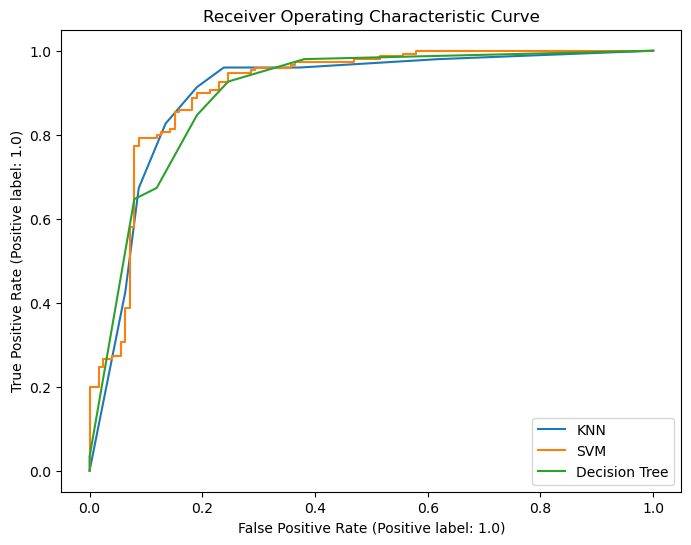

In [98]:
from sklearn.metrics import plot_confusion_matrix,roc_auc_score, roc_curve, f1_score, accuracy_score
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import recall_score, plot_roc_curve
fig, ax = plt.subplots(figsize=(8, 6))
plot_roc_curve(KNN, x_test, y_test, ax=ax, label='KNN')
plot_roc_curve(svm, x_test, y_test, ax=ax, label='SVM')
plot_roc_curve(Tree, x_test, y_test, ax=ax, label='Decision Tree')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

In [97]:
y_pred_proba_dt = KNN.predict_proba(x_test)[:,1]
auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
print("AUC for Decision Tree: {:.3f}".format(auc_dt))

y_pred_proba_svm = svm.decision_function(x_test)
auc_svm = roc_auc_score(y_test, y_pred_proba_svm)
print("AUC for SVM: {:.3f}".format(auc_svm))

y_pred_proba_knn = Tree.predict_proba(x_test)[:,1]
auc_knn = roc_auc_score(y_test, y_pred_proba_knn)
print("AUC for KNN: {:.3f}".format(auc_knn))

AUC for Decision Tree: 0.901
AUC for SVM: 0.910
AUC for KNN: 0.898


### Conclusions:
- In this project, I utilized Machine Learning techniques to predict the occurrence of heart disease in individuals. I started by importing the data and performing exploratory data analysis using plots. Next, I preprocessed the data by generating dummy variables for categorical features and scaling the other features. I then applied four different Machine Learning algorithms, including K Neighbors Classifier, Support Vector Classifier, Decision Tree Classifier, and Random Forest Classifier. For each model, I optimized the parameters to improve their performance. Ultimately, the DT model achieved the highest accuracy score of 90%.